In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression as LR
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import random as rnd
import statsmodels.api as sm
import numpy.linalg as la
import sympy
from sympy import series, Symbol
from sympy.functions import sin, cos, exp
from sympy.plotting import plot

In [64]:
df = pd.read_csv("CensusAndExpectancyIL.csv")

In [65]:
model = LR()
outcome = 'Life Expectancy'
predictors = ['% Households: $75,000 or More',
             '% Total Population: Black or African American Alone',
             "% Bachelor's or More"]

x = df[predictors]
y = df[[outcome]]

In [66]:
reg = model.fit(x, y)
y_hat = reg.predict(x)

In [67]:
residuals = y - y_hat
sd_residuals = residuals.std()

In [68]:
residuals = residuals.rename(columns={'Life Expectancy':"residuals"})

In [70]:
def sr(r):
    return (r/sd_residuals)
residuals['standarized'] = residuals['residuals'].apply(sr)

count = (abs(residuals['standarized']) >= 3).sum()
count

24

In [98]:
residuals['life expectancy'] = df[outcome]
residuals['predicted life expectancy'] = y_hat

one_b = residuals[abs(residuals['standarized']) >= 3]

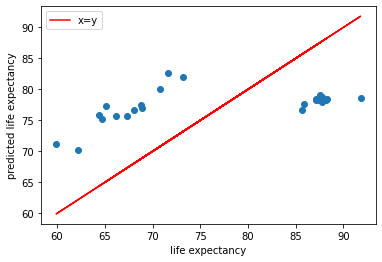

In [99]:
plt.figure()

x_data = one_b['life expectancy']
y_data = one_b['predicted life expectancy']
plt.scatter(x_data, y_data)
plt.xlabel('life expectancy')
plt.ylabel('predicted life expectancy')

plt.plot(x_data, x_data, color = 'red', label = 'x=y')

plt.legend()
plt.show()

In [100]:
one_c = df
one_c['standarized'] = residuals['standarized']
one_c = one_c[abs(one_c['standarized']) >= 3]
pos_one_c = one_c[one_c['standarized'] > 0] # standarized residual of zero not present in current dataset
neg_one_c = one_c[one_c['standarized'] < 0]

In [101]:
pos_one_c.mean().astype(int)

Unnamed: 0                                                                   1500
FIPS                                                                  17093342118
Area (Land)                                                             292903359
Total Population:                                                            3476
% Total Population: White Alone                                                87
% Total Population: Black or African American Alone                             1
Population 25 Years and Over:                                                2365
Civilian Population in Labor Force 16 Years and Over:                        1680
% Civilian Population in Labor Force 16 Years and Over: Employed               95
% Civilian Population in Labor Force 16 Years and Over: Unemployed              4
Households:                                                                  1278
% Households: with Social Security Income                                      36
% Households: No

In [102]:
neg_one_c.mean().astype(int)

Unnamed: 0                                                                    828
FIPS                                                                  17052931700
Area (Land)                                                               5660149
Total Population:                                                            2893
% Total Population: White Alone                                                60
% Total Population: Black or African American Alone                            29
Population 25 Years and Over:                                                2083
Civilian Population in Labor Force 16 Years and Over:                        1552
% Civilian Population in Labor Force 16 Years and Over: Employed               93
% Civilian Population in Labor Force 16 Years and Over: Unemployed              6
Households:                                                                  1297
% Households: with Social Security Income                                      24
% Households: No

[Text(0.5, 0, 'Predicted Life Expectancy'), Text(0, 0.5, '|residuals|')]

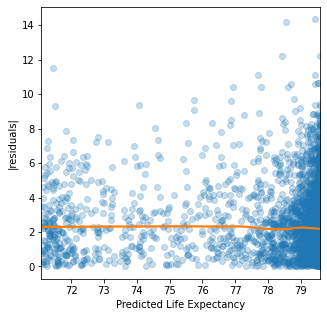

In [205]:
df = pd.read_csv("CensusAndExpectancyIL.csv")

outcome = 'Life Expectancy'
predictors = "% Total Population: Black or African American Alone"

model = LR()
model.fit(df[[predictors]], df[[outcome]])
fitted = model.predict(df[[predictors]])

abs_resids = pd.DataFrame(fitted, columns=['fitted'])
abs_resids['life expectancy'] = df[outcome]
abs_resids['resids'] = (abs_resids['life expectancy'] - abs_resids['fitted'])
abs_resids['abs_resids'] = abs(abs_resids['life expectancy'] - abs_resids['fitted'])

fig, ax = plt.subplots(figsize=(5,5))
sns.regplot(x=fitted, y=abs_resids['abs_resids'],
            scatter_kws={'alpha':0.25}, line_kws={'color':"C1"},
            lowess=True, ax=ax)
ax.set(xlabel='Predicted Life Expectancy', ylabel='|residuals|')

[Text(0.5, 0, 'Heteroskedastically distributed data')]

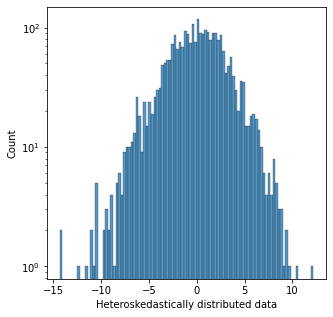

In [206]:
hetero_dat = abs_resids['resids']
fig, ax = plt.subplots(figsize=(5, 5)) # square plot
sns.histplot(data=hetero_dat, bins=100, ax=ax)
ax.set_yscale('log') # emphasize tails
ax.set(xlabel = 'Heteroskedastically distributed data')

[Text(0.5, 0, 'Normally distributed data')]

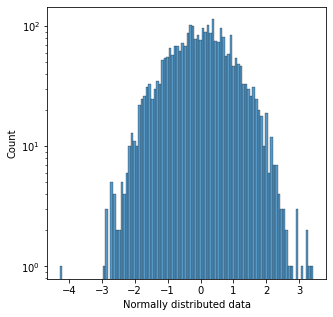

In [151]:
norm_dat = np.random.normal(loc=0.0, scale=1, size=3000)
fig, ax = plt.subplots(figsize=(5, 5)) # square plot
sns.histplot(data=norm_dat, bins=100, ax=ax)
ax.set_yscale('log') # emphasize tails
ax.set(xlabel = 'Normally distributed data')

In [200]:
df = pd.read_csv("CensusAndExpectancyIL.csv")

predictors = ['% Total Population: Black or African American Alone',"% Bachelor's or More",'% Households: $75,000 or More']
outcome = ['Life Expectancy']

sm_mdl = sm.OLS(df[outcome],df[predictors].assign(const=1))
sm_result = sm_mdl.fit()

In [202]:
sm_result.params[predictors]

% Total Population: Black or African American Alone   -0.052049
% Bachelor's or More                                   0.038987
% Households: $75,000 or More                          0.079836
dtype: float64

KeyError: "% Bachelor's or More"

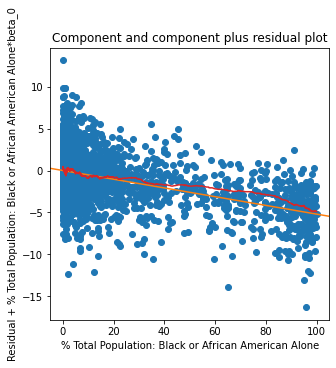

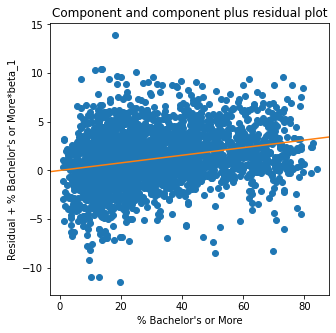

In [201]:
for prd in predictors:
    fig, ax = plt.subplots(figsize=(5, 5))
    sm.graphics.plot_ccpr(sm_result, prd, ax=ax)
    ax.lines[1].set_color('C1')
    coef = sm_result.params[prd]
    part_resid = sm_result.resid + coef*df[prd]
    df = pd.DataFrame({'x': np.array(df[prd]), 'y': np.array(part_resid)})
    df = df.sort_values(by='x') # !
    df['smth'] = df['y'].rolling(window=200).mean()
    plt.plot(df['x'], df['smth'], color='C3')

In [236]:
df = pd.read_csv("FirearmOwnershipAndMortalityRates.csv")

predictors = ['HFR']
outcome = ['MortalityPer100k']

sm_mdl = sm.OLS(df[outcome],df[predictors].assign(const=1))
sm_result = sm_mdl.fit()

sm_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       MortalityPer100k   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     496.8
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           6.13e-88
Time:                        21:21:32   Log-Likelihood:                -1172.6
No. Observations:                 900   AIC:                             2349.
Df Residuals:                     898   BIC:                             2359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HFR            4.8737      0.219     22.288      0.000       4.445       5.303
const          0.4142      0.090      4.583      0.000       0.237       0.592
==============================================================================
Omnibus:                      328.794   Durbin-Watson:                   0.414
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1354.809
Skew:                           1.688   Prob(JB):                    6.41e-295
Kurtosis:                       7.973   Cond. No.                         8.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

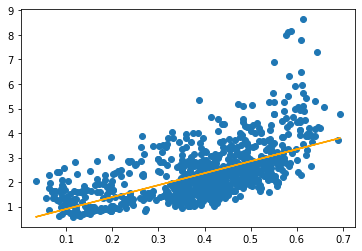

In [249]:
df = pd.read_csv("FirearmOwnershipAndMortalityRates.csv")

plt.figure()

plt.scatter(df[predictors],df[outcome])

x = df[predictors]

plt.plot(x, (sm_result.params[1] + (sm_result.params[0] * x)), color = 'orange',label='linear regression')

plt.show()

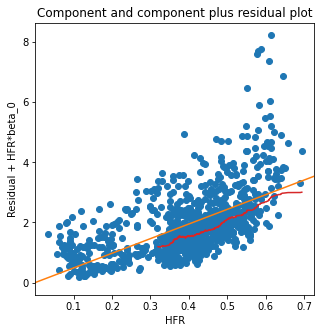

In [237]:
for prd in predictors:
    fig, ax = plt.subplots(figsize=(5, 5))
    sm.graphics.plot_ccpr(sm_result, prd, ax=ax)
    ax.lines[1].set_color('C1')
    coef = sm_result.params[prd]
    part_resid = sm_result.resid + coef*df[prd]
    df = pd.DataFrame({'x': np.array(df[prd]), 'y': np.array(part_resid)})
    df = df.sort_values(by='x') # !
    df['smth'] = df['y'].rolling(window=200).mean()
    plt.plot(df['x'], df['smth'], color='C3')

In [279]:
df = pd.read_csv("FirearmOwnershipAndMortalityRates.csv")
import statsmodels.formula.api as smf

formula = 'MortalityPer100k ~ bs(HFR, df=3, degree=1)'

model_spline = smf.ols(formula=formula, data=df)
result_spline = model_spline.fit()

In [280]:
result_spline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       MortalityPer100k   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     245.6
Date:                Wed, 19 Oct 2022   Prob (F-statistic):          2.78e-116
Time:                        22:53:26   Log-Likelihood:                -1100.7
No. Observations:                 900   AIC:                             2209.
Df Residuals:                     896   BIC:                             2229.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      1.2268      0.104     11.841      0.000       1.023       1.430
bs(HFR, df=3, degree=1)[0]     0.7255      0.133      5.443      0.000       0.464       0.987
bs(HFR, df=3, degree=1)[1]     1.0457      0.117      8.967      0.000       0.817       1.275
bs(HFR, df=3, degree=1)[2]     3.9767      0.182     21.856      0.000       3.620       4.334
==============================================================================
Omnibus:                      275.105   Durbin-Watson:                   0.520
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              909.622
Skew:                           1.471   Prob(JB):                    3.01e-198
Kurtosis:                       6.950   Cond. No.                         9.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [281]:
b0 = result_spline.params[0]
resid = df
resid['partial_res'] = resid['MortalityPer100k'] - b0

<Figure size 432x288 with 0 Axes>

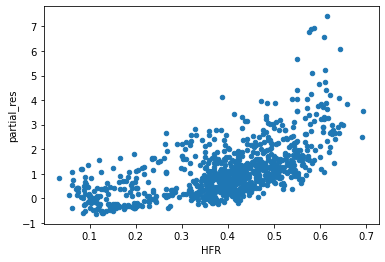

In [282]:
plt.figure()

resid.plot.scatter('HFR','partial_res')

plt.show()

In [325]:
df = pd.read_csv("FoodAccessResearchAtlasIL.csv")
df = df[df['CensusTract']!=17031350400]
df = df.dropna(subset=predictors+[outcome])

norm_df = (df[predictors]-df[predictors].mean())/df[predictors].std()
norm_df['Urban'] = df['Urban']
norm_df['LowAccessHalfMile'] = df['LowAccessHalfMile']

urban = norm_df[norm_df['Urban'] == 1]

predictors = ['MedianFamilyIncome','PrcntSNAP','PrcntAA','PrcntNoVehicle','PrcntHispanic']
outcome = 'LowAccessHalfMile'

from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(solver='lbfgs')
X=urban[predictors]
y=urban[outcome]
LogReg.fit(X,y)

LogisticRegression()

In [326]:
# Probability of Low Food Access
(794+1895)/m.sum()

0.8693824765599741

In [327]:
#accuracy of prediction
LogReg.score(X,y)

0.8597771801767192

In [328]:
LogReg.coef_

array([[-0.42726169,  0.58033969, -0.44096119, -1.72216446, -1.16390396]])

In [329]:
from sklearn import metrics
y_test_pred = LogReg.predict(X)
m = metrics.confusion_matrix(y, y_test_pred)
m

array([[ 346,  255],
       [ 110, 1892]])

In [330]:
metrics.f1_score(y, y_test_pred)

0.9120269944564955

In [301]:
X,y = norm_df[predictors], norm_df[outcome]
logit_reg_sm = sm.GLM(y, X.assign(const=1),family=sm.families.Binomial())
logit_result = logit_reg_sm.fit()
print(logit_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      LowAccessHalfMile   No. Observations:                 3093
Model:                            GLM   Df Residuals:                     3087
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 19 Oct 2022   Deviance:                   2.4390e+05
Time:                        23:25:38   Pearson chi2:                 1.43e+19
No. Iterations:                    14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
MedianFamilyIncome   1.96e+15   1.76

/Users/jiheeyou/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/jiheeyou/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:947: RuntimeWarning: divide by zero encountered in log
  y * np.log(mu / (1 - mu + 1e-20)) +
/Users/jiheeyou/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
